In [1]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from twitter_config import (consumer_key,
                    consumer_key_secret,
                    access_token,
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
sentiments=[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_comp_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

In [3]:
for x in range(1,6):
    target_user = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")
    
    for user in target_user:
        public_tweets = api.user_timeline(user, page=x)

        for tweet in public_tweets:
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])
            tweet_data["tweet_comp_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])

In [4]:
df_tweet_data = pd.DataFrame.from_dict(tweet_data)
df_tweet_data = df_tweet_data.reset_index()
df_tweet_data = df_tweet_data.rename(columns={'index':'tweet_count'})
df_tweet_data

,tweet_count,tweet_comp_score,tweet_date,tweet_neg_score,tweet_neu_score,tweet_pos_score,tweet_source,tweet_text
0,0,0.5574,Tue Jul 10 07:01:05 +0000 2018,0.073,0.733,0.193,BBC News (World),RT @SallyBundockBBC: The great escape - if you...
1,1,-0.7906,Tue Jul 10 06:58:49 +0000 2018,0.467,0.533,0.000,BBC News (World),Syria war: What we know about Douma 'chemical ...
2,2,0.4404,Tue Jul 10 06:12:46 +0000 2018,0.000,0.707,0.293,BBC News (World),World's 'oldest coloured molecules' are bright...
3,3,0.5106,Tue Jul 10 06:10:20 +0000 2018,0.000,0.732,0.268,BBC News (World),The latest from the cave rescue in Thailand\n\...
4,4,-0.0516,Tue Jul 10 05:41:00 +0000 2018,0.130,0.870,0.000,BBC News (World),Dissident Liu Xiaobo's widow 'allowed to leave...
5,5,0.5106,Tue Jul 10 05:40:21 +0000 2018,0.000,0.798,0.202,BBC News (World),Elon Musk's offer 'not practical' for cave mis...
6,6,0.7184,Tue Jul 10 05:15:28 +0000 2018,0.000,0.727,0.273,BBC News (World),RT @BBCBreaking: #ThailandCaveRescue: Remainin...
7,7,-0.6705,Tue Jul 10 02:55:20 +0000 2018,0.333,0.667,0.000,BBC News (World),Japan floods: 126 killed after torrential rain...
8,8,0.0258,Tue Jul 10 02:47:04 +0000 2018,0.000,0.952,0.048,BBC News (World),RT @SallyBundockBBC: The #WorldCup is down to ...
9,9,-0.4215,Tue Jul 10 02:40:04 +0000 2018,0.237,0.763,0.000,BBC News (World),Australia and NZ recall frozen vegetables over...


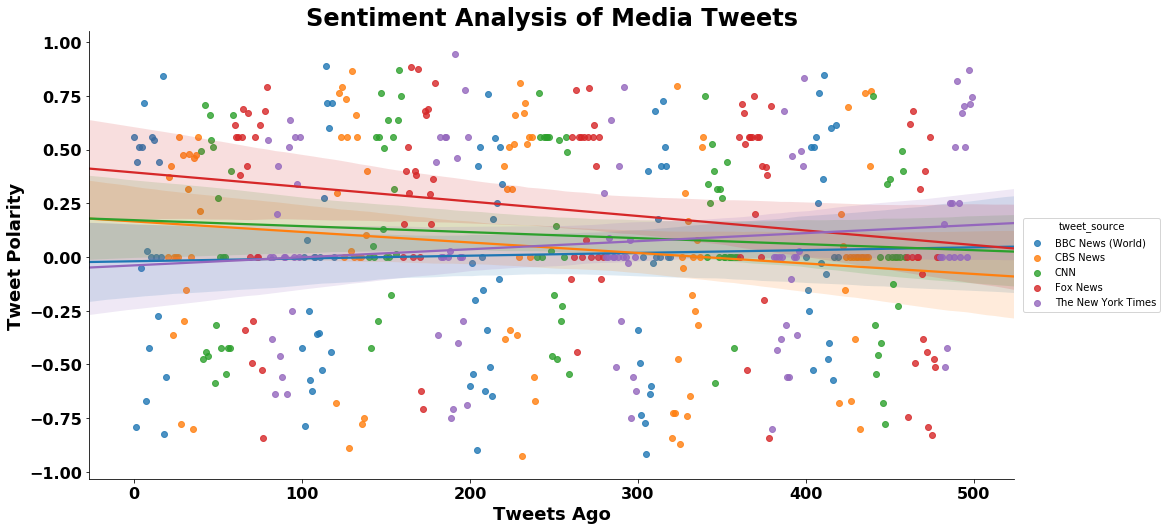

In [5]:
ax = sns.lmplot(x='tweet_count',
            y='tweet_comp_score',
            data=df_tweet_data,
            size=7,
            aspect=2,
            hue='tweet_source',
            legend=False)
ax.add_legend(label_order=['BBC News (World)','CBS News','CNN','Fox News','The New York Times'])
plt.title('Sentiment Analysis of Media Tweets',fontsize=24,fontweight='bold')
plt.xlabel('Tweets Ago',fontsize=18,fontweight='bold')
plt.ylabel('Tweet Polarity',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.show()
plt.savefig('sentiment_analysis.png')

In [6]:
df_tweet_mean = np.round(df_tweet_data.groupby('tweet_source').mean(),3)
df_tweet_mean = df_tweet_mean.drop(columns=['tweet_count','tweet_neg_score','tweet_neu_score','tweet_pos_score'])
df_tweet_comp = df_tweet_mean.reset_index()
df_tweet_comp

,tweet_source,tweet_comp_score
0,BBC News (World),0.007
1,CBS News,0.053
2,CNN,0.102
3,Fox News,0.211
4,The New York Times,0.070


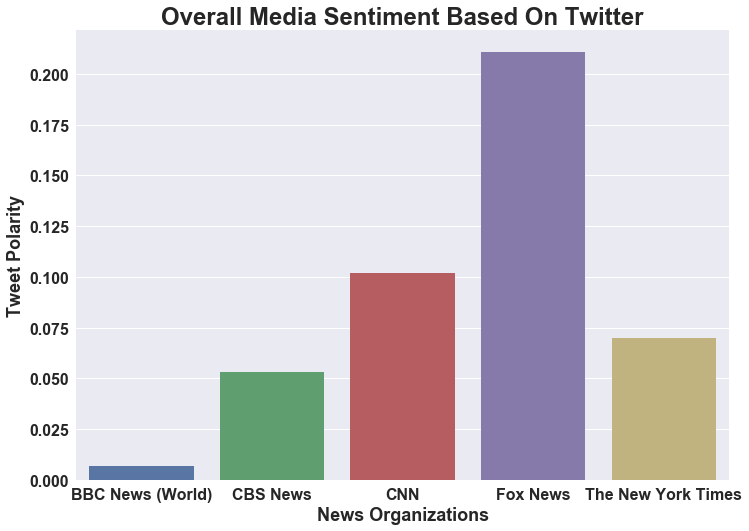

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='tweet_source',
            y='tweet_comp_score',
            data=df_tweet_comp)
plt.title('Overall Media Sentiment Based On Twitter',fontsize=24,fontweight='bold')
plt.xlabel('News Organizations',fontsize=18,fontweight='bold')
plt.ylabel('Tweet Polarity',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.show()
plt.savefig('compound_sentiment.png')

In [8]:
df_tweet_data.to_csv('tweet_data.csv')